We are to design and implement a quantum circuit that returns $|01\rangle$ or $|10\rangle$ with equal probability. We can only use the following gates: CX, RX and RY. In what follows we show how these gates work and then propose the circuit. The idea is to apply RY$(\frac{\pi}{2})$ on the first qubit, then the C-NOT from the first qubit to the second and then an RX$(\pi)$ on the second qubit. 

Starting from $|0\rangle|0\rangle$ the first transformation is in effect

$$ |0\rangle|0\rangle \mapsto \big(\cos{\frac{\pi}{2}} |0\rangle + \sin{\frac{\pi}{2}} |1\rangle\big)|0\rangle$$

When we apply the CX (C-NOT) gate we obtain the following

$$\cos{\frac{\pi}{2}}|00\rangle + \sin{\frac{\pi}{2}}|11\rangle$$

The last step completes the transformation to what we needed: 

$$\cos{\frac{\pi}{2}}|01\rangle + \sin{\frac{\pi}{2}}|10\rangle$$

Now let's see this step by step.

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from math import pi

In [2]:
from qiskit.visualization import plot_histogram

In [3]:
qc = QuantumCircuit(1)

In [4]:
qc.ry(pi/2, 0)

In [5]:
qc.draw()

┌──────────┐
q_0: ┤ RY(pi/2) ├
     └──────────┘

In [6]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()

In [7]:
print( result.get_statevector() )

[0.70710678+0.j 0.70710678+0.j]


So after looking at RY let's also take a look at RX then implement the circuit.

In [8]:
qc = QuantumCircuit(1)

In [9]:
qc.rx(pi/2, 0)

In [10]:
qc.draw()

┌──────────┐
q_0: ┤ RX(pi/2) ├
     └──────────┘

In [11]:
result = execute(qc, backend).result()

In [12]:
print( result.get_statevector() )

[7.07106781e-01+0.j         4.32978028e-17-0.70710678j]


This circuit has two qubits. We apply the gates as indicated at the outset.

In [13]:
qc = QuantumCircuit(2, 2)
qc.ry(pi/2, 0)
qc.cx(0, 1)
qc.rx(pi, 1)
qc.draw()

┌──────────┐               
q_0: ┤ RY(pi/2) ├──■────────────
     └──────────┘┌─┴─┐┌────────┐
q_1: ────────────┤ X ├┤ RX(pi) ├
                 └───┘└────────┘
c_0: ═══════════════════════════
                                
c_1: ═══════════════════════════

Let's get ready to measure our output.

In [14]:
for j in range(2):
    qc.measure(j,j)
qc.draw()

┌──────────┐               ┌─┐   
q_0: ┤ RY(pi/2) ├──■────────────┤M├───
     └──────────┘┌─┴─┐┌────────┐└╥┘┌─┐
q_1: ────────────┤ X ├┤ RX(pi) ├─╫─┤M├
                 └───┘└────────┘ ║ └╥┘
c_0: ════════════════════════════╩══╬═
                                    ║ 
c_1: ═══════════════════════════════╩═

We now run the experiment.

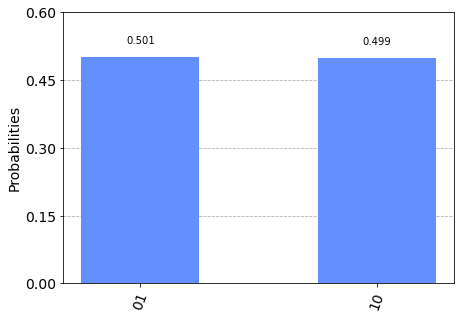

In [15]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

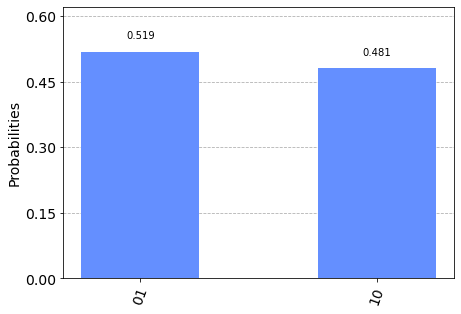

In [16]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

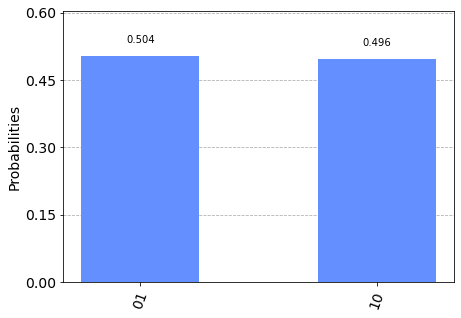

In [17]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

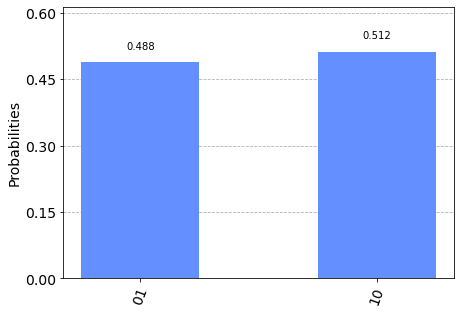

In [18]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

This concludes our experiment. 

Adrian German

dgerman@indiana.edu
